# Actividad: Mapas de calor y boxplots

Pablo César Jiménez Villeda A01703517

Carolina Lucas Dophe A01702450

Esteban Folch Padilla A01701569

In [45]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install sklearn
!pip install seaborn

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sb

data=pd.read_csv('healthcare_dataset_stroke_data.csv')

In [47]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [48]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [49]:
pd.unique(data['gender'])

array(['Male', 'Female', 'Other'], dtype=object)

In [50]:
data['gender'].describe()

count       5110
unique         3
top       Female
freq        2994
Name: gender, dtype: object

Con la estadística descriptiva se concluye:
- 2994 de las 5110 son mujeres
- Son tres generos registrados

In [51]:
pd.unique(data['age'])

array([6.70e+01, 6.10e+01, 8.00e+01, 4.90e+01, 7.90e+01, 8.10e+01,
       7.40e+01, 6.90e+01, 5.90e+01, 7.80e+01, 5.40e+01, 5.00e+01,
       6.40e+01, 7.50e+01, 6.00e+01, 5.70e+01, 7.10e+01, 5.20e+01,
       8.20e+01, 6.50e+01, 5.80e+01, 4.20e+01, 4.80e+01, 7.20e+01,
       6.30e+01, 7.60e+01, 3.90e+01, 7.70e+01, 7.30e+01, 5.60e+01,
       4.50e+01, 7.00e+01, 6.60e+01, 5.10e+01, 4.30e+01, 6.80e+01,
       4.70e+01, 5.30e+01, 3.80e+01, 5.50e+01, 1.32e+00, 4.60e+01,
       3.20e+01, 1.40e+01, 3.00e+00, 8.00e+00, 3.70e+01, 4.00e+01,
       3.50e+01, 2.00e+01, 4.40e+01, 2.50e+01, 2.70e+01, 2.30e+01,
       1.70e+01, 1.30e+01, 4.00e+00, 1.60e+01, 2.20e+01, 3.00e+01,
       2.90e+01, 1.10e+01, 2.10e+01, 1.80e+01, 3.30e+01, 2.40e+01,
       3.40e+01, 3.60e+01, 6.40e-01, 4.10e+01, 8.80e-01, 5.00e+00,
       2.60e+01, 3.10e+01, 7.00e+00, 1.20e+01, 6.20e+01, 2.00e+00,
       9.00e+00, 1.50e+01, 2.80e+01, 1.00e+01, 1.80e+00, 3.20e-01,
       1.08e+00, 1.90e+01, 6.00e+00, 1.16e+00, 1.00e+00, 1.40e

In [52]:
data['age'].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [53]:
data['age'].max()-data['age'].min()

81.92

In [54]:
data['age'].median()

45.0

Con la estadística descriptiva se concluye:
- La edad máxima registrada fue de 82 años 
- El promedio de edades fue de 43 años
- El rango de edades fue de 81.92 años

In [55]:
pd.unique(data['hypertension'])

array([0, 1], dtype=int64)

In [56]:
data['hypertension'].describe()

count    5110.000000
mean        0.097456
std         0.296607
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: hypertension, dtype: float64

Con la estadística descriptiva se concluye:
- Hay un mayor número de personas sin hipertensión, debido a que el valor de la media es más cercano al valor de 0, el cual indica un valor falso.

In [57]:
pd.unique(data['heart_disease'])

array([1, 0], dtype=int64)

In [58]:
data['heart_disease'].describe()

count    5110.000000
mean        0.054012
std         0.226063
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: heart_disease, dtype: float64

Con la estadística descriptiva se concluye:
- Hay un mayor número de personas sin enfermedades del corazón, debido a que el valor de la media es más cercano al valor de 0, el cual indica un valor falso.

In [59]:
pd.unique(data['ever_married'])

array(['Yes', 'No'], dtype=object)

In [60]:
data['ever_married'].describe()

count     5110
unique       2
top        Yes
freq      3353
Name: ever_married, dtype: object

Con la estadística descriptiva se concluye:
- La mayoría de las personas encuestadas se encontraban casadas.

In [61]:
pd.unique(data['work_type'])

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [62]:
data['work_type'].describe()

count        5110
unique          5
top       Private
freq         2925
Name: work_type, dtype: object

Con la estadística descriptiva se concluye:
- La mayoría de las personas encuestadas tiene un trabajo en el sector privado.

In [63]:
pd.unique(data['Residence_type'])

array(['Urban', 'Rural'], dtype=object)

In [64]:
data['Residence_type'].describe()

count      5110
unique        2
top       Urban
freq       2596
Name: Residence_type, dtype: object

Con la estadística descriptiva se concluye:
- La mayoría de las personas encuestadas viven en zonas urbanas.

In [65]:
pd.unique(data['avg_glucose_level'])

array([228.69, 202.21, 105.92, ...,  82.99, 166.29,  85.28])

In [66]:
data['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [67]:
data['avg_glucose_level'].max()-data['avg_glucose_level'].min()

216.62

In [68]:
data['avg_glucose_level'].median()

91.88499999999999

Con la estadística descriptiva se concluye:
- El valor promedio de niveles de glucosa es de 106.14
- El rango de valores de glucosa es de 216.62
- El valor máximo de nivel de glucosa es de 271.74
- El valor mínimo de nivel de glucosa es de 55.12

In [69]:
pd.unique(data['bmi'])

array([36.6,  nan, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. ,
       24.1, 45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2,
       29.4, 24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1,
       31.3, 31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8,
       21.8, 27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2,
       23.6, 22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. ,
       42.5, 35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. ,
       28.6, 42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4,
       40.5, 36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. ,
       22. , 39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23

In [70]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [71]:
data['bmi'].max()-data['bmi'].min()

87.3

In [72]:
data['bmi'].median()

28.1

Con la estadística descriptiva se concluye:
- El promedio de IMC de las personas es de 28.89 kg/m^2
- El valor mínimo de IMC de las personas encuestadas es de 10.30 kg/m^2
- El rango de valores de IMC de las personas encuestadas es de 87.3 kg/m^2
- El valor máximo de IMC de las personas encuestadas es de 97.60 kg/m^2

In [73]:
pd.unique(data['smoking_status'])

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [74]:
data['smoking_status'].describe()

count             5110
unique               4
top       never smoked
freq              1892
Name: smoking_status, dtype: object

Con la estadística descriptiva se concluye:
- La mayoría de las personas encuestadas nunca había fumado.

In [75]:
pd.unique(data['stroke'])

array([1, 0], dtype=int64)

In [76]:
data['stroke'].describe()

count    5110.000000
mean        0.048728
std         0.215320
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: stroke, dtype: float64

Con la estadística descriptiva se concluye:
- Hay un mayor número de personas sin infartos, debido a que el valor de la media es más cercano al valor de 0, el cual indica un valor falso.

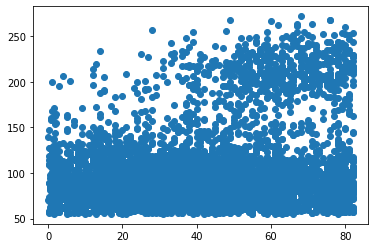

In [77]:
plt.plot(data.age, data.avg_glucose_level, 'o')
plt.show()

Las personas de mayor edad son más propensas a contar con altos niveles de glucosa

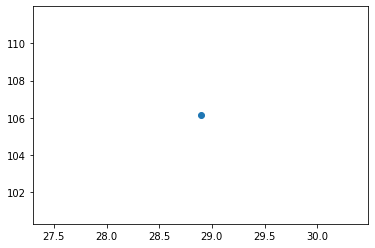

In [78]:
plt.plot(data['bmi'].mean(), data['avg_glucose_level'].mean(), 'o')
plt.show()

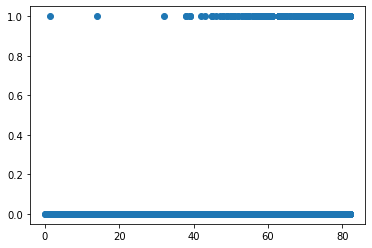

In [79]:
plt.plot(data.age, data.stroke, 'o')
plt.show()

A mayor edad, las personas tienen una mayor probabilidad de tener un infarto

# Visualización de diagramas

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'stroke'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

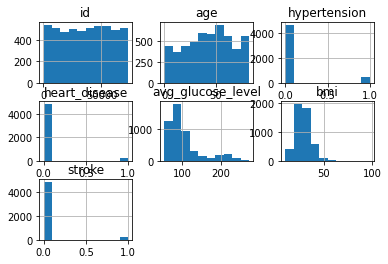

In [80]:
data.drop([0,1]).hist()

In [81]:
data.corr(method='pearson')

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


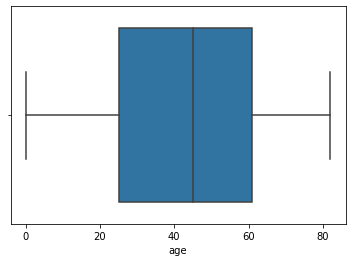

In [88]:
#data.set_theme(style="whitegrid")
#healthcare= sb.load_dataset('healthcare_dataset_stroke_data.csv')
ax= sb.boxplot(x=data["age"])


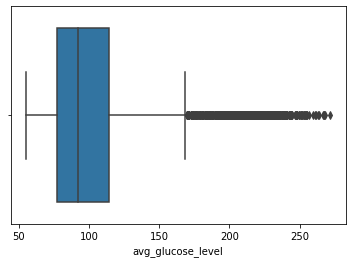

In [89]:
ax= sb.boxplot(x=data["avg_glucose_level"])

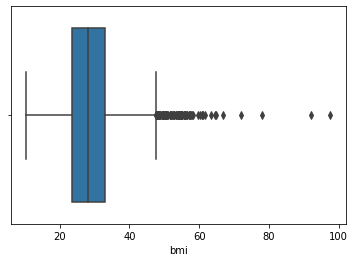

In [90]:
ax= sb.boxplot(x=data["bmi"])

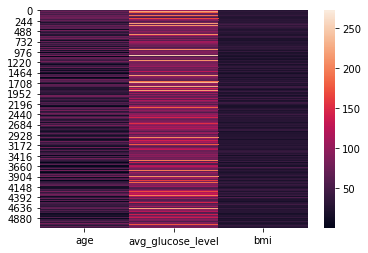

In [85]:
healthcare = pd.read_csv('stroke.csv')
ax=sb.heatmap(healthcare)

**Preguntas detonadoras de análisis**

¿Hay alguna variable que no aporta información?
La variable id no aporta información relevante sobre las causas a las enfermedades cardíacas, es sólo una manera de identificar a los encuestados. Por el contrario, aunque las variables booleanas de la base de datos no aportan mucha información al momento de obtener valores estadíticos descriptivos, si son importantes para observar si el valor verdaero se presenta de forma más frecuente a medida que aumentan variables que presentan valores flotantes.

Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?
La varaible work_type se puede eliminar debido a que no especifica la cantidad de horas y si es un trabajo físicamente demandante. También la varaible ever_married puede eliminarse, ya que el estado civil de una persona no debería afectar qué tan propensa es una persona a tener un infarto. Del mismo modo, la varaible Residence_type podría eliminarse porque el lugar donde vive un encuestado no tiene efectos sobre la aparición de enefermedades del corazón. 

¿Existen variables que tengan datos extraños?
La variable ibm cuenta con valores NA, lo que en excel indica que ha sucedido un error al momento de computar dicho valor, por tanto, no existe un valor de ibm para algunos encuestados.

Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?
Todas las variables cuentan con rangos diferentes, pues cada una de estas mide uno de los diferentes factores que pueden afectar qué tan propensa es una persona a tener un infarto, inclusive los valores que para algunas variables son muy bajos, en otras pueden representar la ausencia de buena salud y que el encuestado se encuentra en riesgo.

¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?
Gracias a los histogramas, se puede apreciar que el grupo de variables referente a la existencia de enfermedades del corazón mantiene similitudes entre sus miembros, pues la gran mayoría de los encuestados no padece de estas enfermedades.  Del mismo modo, las variables de nivel de glucosa y bmi tienen un acomodamiento de datos similar al mostrar una tendencia similar, ya que de acuerdo a estos histogramas la mayoría de los encuestados tiene un nivel bajo en estos parámetros.
